<a href="https://colab.research.google.com/github/LuisMatusM/Hello-Wold/blob/main/Sesi%C3%B3n_05_Distribuciones_muestrales_y_t%C3%A9cnicas_de_evaluaci%C3%B3n_de_modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/diabetes-clean.csv', index_col=0)
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df['glucose'].sample(n=20, replace=False) #sample es para que te de una muestra de ciera cantidad de datos definidas en 'n='

423    115
617     68
421     94
297    126
512     91
561    198
353     90
586    143
148    147
1       85
179    130
152    156
85     110
344     95
361    158
736    126
228    197
312    155
93     134
266    138
Name: glucose, dtype: int64

In [5]:
df['glucose'].sample(n=20, replace=True) # replace es para indicar si se quiere reemplasamiento

226    101
524    125
389    100
377     87
248    124
740    120
287    119
748    187
180     87
40     180
388    144
379     93
552    114
524    125
79     112
144    154
375    140
128    117
246    122
442    117
Name: glucose, dtype: int64

Boootstrap

In [6]:
glucose = df['glucose']

means = []
for _ in range(100000):
    sample= glucose.sample(n=50, replace=True)
    means.append(sample.mean())

serie_means = pd.Series(means)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


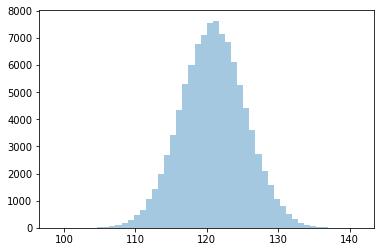

In [7]:
sns.distplot(serie_means, kde=False, norm_hist=False)

In [12]:
# la asimetria (skew) indica la falta de simetria en una distribución. si es cerca de 0 es simetrica, 
    #si es mayor a 0 indica que la cola de la derecha es mas grande, si es menor a 0 es que la cola de la izquierda es más grande
# la curtosis es una media de dispersión de los datos, entre más pequeña la muestra mayor la curtosis
    # si es 0 la dispersión de los datos es normal y la campana es normal, si es mayor la campana es más chata

In [8]:
serie_means.skew()

0.02219099547504194

In [10]:
serie_means.kurtosis()

0.02996800556153012

### Reto 1
En este Reto vamos a aplicar la técnica de bootstrap para explorar distribuciones muestrales de estadísticas. Para este Reto puedes elegir cualquiera de los datasets que vienen incluidos en este módulo. Ha llegado el momento de que te dejes guiar por tu curiosidad. Puedes ver una lista de todo lo que hay disponible acá.
Elige un dataset que tenga alguna variable numérica que te parezca interesante. Ahora, vamos a realizar algunos análisis sobre esa variable. Recuerda escribir tu análisis de manera ordenada, ya que si lo deseas habrá oportunidad de presentar tus hallazgos al grupo. Lleva a cabo los siguientes pasos:
* Primero saca tus estimados de locación y dispersión.
* Después, grafica tu variable usando un histograma y un boxplot, para que tengas una idea más detallada de su distribución.
* Si consideras que hay valores atípicos, lidia con ellos de la manera que te parezca más adecuada.
* Ahora vamos a ver qué tanta incertidumbre y sesgo hay en tus hallazgos. Vamos a aplicar la técnica de bootstrap 3 veces:
- a) Realiza 100 000 remuestreos, cada uno de 50 elementos. Obtén la medida estadística que te interese de cada muestra y guarda los resultados en una lista.
- b) Repite el mismo proceso, pero esta vez con remuestreos con longitud de 20% del total de los datos.
- c) Repite una vez más, pero esta vez cada nueva muestra tendrá una longitud de 90% de la original.
* Grafica cada una de las listas resultantes en un histograma.
*Obtén la asimetría y curtosis de cada una y compáralas entre ellas. ¿Cuál es más similar a una distribución normal? ¿Qué diferencias tienen entre ellas?

In [15]:
reto = pd.read_csv('/content/drive/MyDrive/Datasets/near_earth_objects-jan_feb_1995-clean.csv', index_col=0)
reto.head()

,id,name,is_potentially_hazardous_asteroid,estimated_diameter.meters.estimated_diameter_min,estimated_diameter.meters.estimated_diameter_max,close_approach_date,epoch_date_close_approach,orbiting_body,relative_velocity.kilometers_per_second,relative_velocity.kilometers_per_hour
0,2154652,154652 (2004 EP20),False,483.676488,1081.533507,1995-01-07,789467580000,Earth,16.142864,58114.308667
1,3153509,(2003 HM),True,96.506147,215.794305,1995-01-07,789491340000,Earth,12.351044,44463.757734
2,3516633,(2010 HA),False,44.111820,98.637028,1995-01-07,789446820000,Earth,6.220435,22393.567277
3,3837644,(2019 AY3),False,46.190746,103.285648,1995-01-07,789513900000,Earth,22.478615,80923.015021
4,3843493,(2019 PY),False,22.108281,49.435619,1995-01-07,789446700000,Earth,4.998691,17995.288355


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


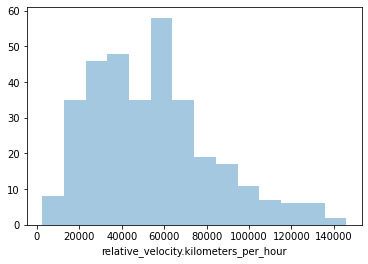

In [28]:
km_x_hora = reto['relative_velocity.kilometers_per_hour']
sns.distplot(km_x_hora,kde=False, norm_hist=False)

In [29]:
km_x_hora.mean()

53943.220487413935

In [26]:
km_x_hora.skew()

0.7530365217894932

In [27]:
km_x_hora.kurtosis()

0.261362835099332

In [18]:
media = []
for _ in range(100000):
    muestra=km_x_hora.sample(n=50, replace=True)
    media.append(muestra.mean())

serie_media=pd.Series(media)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


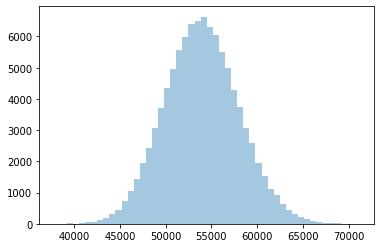

In [19]:
sns.distplot(serie_media, kde=False, norm_hist=False)

In [20]:
serie_media.skew()

0.0984322784984194

In [21]:
serie_media.kurtosis()

0.006858271714562214

In [43]:
media2=[]
for _ in range(100000):
    muestra2=km_x_hora.sample(n=67, replace=True)
    media2.append(muestra2.mean())

serie_media_20=pd.Series(media2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


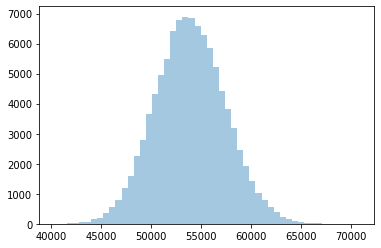

In [44]:
sns.distplot(serie_media_20,kde=False, norm_hist=False)

In [45]:
serie_media_20.skew()

0.077205112847839

In [46]:
serie_media_20.kurtosis()

-0.008143398147534953

In [48]:
media3=[]
for _ in range(100000):
    muestra3=km_x_hora.sample(n=299, replace=True)
    media3.append(muestra3.mean())

serie_media_90=pd.Series(media3)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


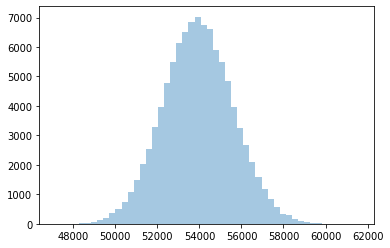

In [49]:
sns.distplot(serie_media_90, kde=False, norm_hist=False)

In [50]:
serie_media_90.skew()

0.05159108221036834

In [51]:
serie_media_90.kurtosis()

0.00832636824495836

Error estadar e Intervalo de confianza

In [30]:
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
means = []
for _ in range(100000):
    sample= glucose.sample(n=50, replace=True)
    means.append(sample.mean())

serie_means = pd.Series(means)

In [32]:
print(f'El error estandar es: {serie_means.std()}')

El error estandar es: 4.519152285052167


In [35]:
print(f'Valor mínimo: {serie_means.min()}')
print(f'Media: {serie_means.mean()}')
print(f'Valor máximo: {serie_means.max()}')
print(f'Rango: {serie_means.max()-serie_means.min()}')

Valor mínimo: 100.4
Media: 120.89521419999951
Valor máximo: 140.02
Rango: 39.620000000000005


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


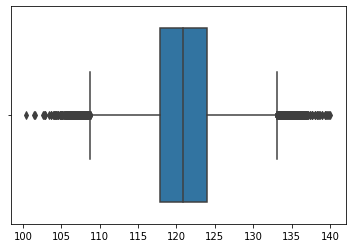

In [34]:
sns.boxplot(serie_means)

In [52]:
limite_inferior=serie_means.quantile(0.025)
limita_superior=serie_means.quantile(0.975)

In [53]:
print(f'Intervalo del 95% confianza de la meda:{limite_inferior} < {glucose.mean()} > {limita_superior}')

Intervalo del 95% confianza de la meda:112.12 < 120.89453125 > 129.8


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


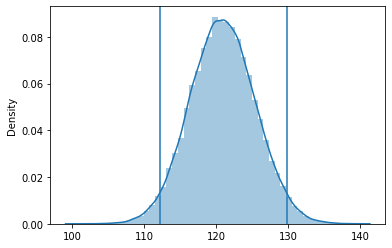

In [54]:
sns.distplot(serie_means, kde=True, norm_hist=False);
plt.axvline(limita_superior)
plt.axvline(limite_inferior)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


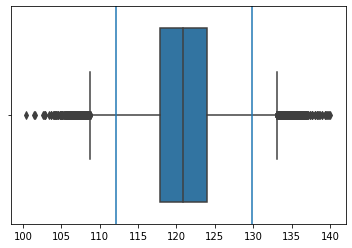

In [56]:
sns.boxplot(serie_means)
plt.axvline(limita_superior)
plt.axvline(limite_inferior)

### Reto 2
Para este Reto de nuevo podrás elegir el dataset de tu agrado. Elige un dataset o una variable distinta que la del Reto anterior. Recuerda ordenar y explicar bien tu análisis para que sea comprensible para los demás. Una vez que hayas elegido un dataset y una variable que te parezcan interesantes, realiza los siguientes pasos:
* Primero explora tu variable con los métodos tradicionales: estimados de locación y dispersión, histograma, etc.
* Ahora usa la técnica de bootstrap para obtener la distribución muestral de la media y de la mediana de tu variable. Elige los parámetros más adecuados para el bootstrap basándote en los resultados obtenidos en el Reto anterior.
* Grafica la distribución muestral de la media y la mediana.
* Ahora, obtén el error estándar de ambas medidas estadísticas. Utiliza el mínimo, el máximo y el rango para contextualizar tu error estándar y saber qué tan grande o pequeño es.
* Ahora, para cada medida estadística obtén los intervalos de confianza de 90%, 95% y 99%. Compara los resultados.
* Comparte tus hallazgos con tus compañeros.

In [57]:
reto.head()

,id,name,is_potentially_hazardous_asteroid,estimated_diameter.meters.estimated_diameter_min,estimated_diameter.meters.estimated_diameter_max,close_approach_date,epoch_date_close_approach,orbiting_body,relative_velocity.kilometers_per_second,relative_velocity.kilometers_per_hour
0,2154652,154652 (2004 EP20),False,483.676488,1081.533507,1995-01-07,789467580000,Earth,16.142864,58114.308667
1,3153509,(2003 HM),True,96.506147,215.794305,1995-01-07,789491340000,Earth,12.351044,44463.757734
2,3516633,(2010 HA),False,44.111820,98.637028,1995-01-07,789446820000,Earth,6.220435,22393.567277
3,3837644,(2019 AY3),False,46.190746,103.285648,1995-01-07,789513900000,Earth,22.478615,80923.015021
4,3843493,(2019 PY),False,22.108281,49.435619,1995-01-07,789446700000,Earth,4.998691,17995.288355


In [82]:
dmax = reto['estimated_diameter.meters.estimated_diameter_max']

In [62]:
dmax.min()

2.978790628

In [59]:
dmax.mean()

410.0860422397653

In [63]:
dmax.max()

6516.883821679

In [60]:
dmax.median()

215.7943048444

In [61]:
dmax.std()

614.691591855223

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


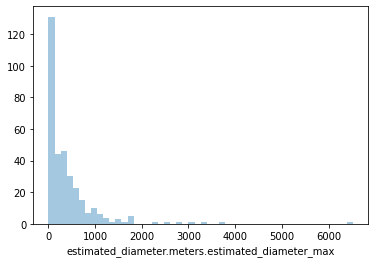

In [64]:
sns.distplot(dmax, kde=False, norm_hist=False)

In [83]:
dmax_media = []
dmax_mediana = []

for _ in range(100000):
    muestra_d= dmax.sample(n=50, replace=True)
    dmax_media.append(muestra_d.mean())
    dmax_mediana.append(muestra_d.median())

serie_media_dmax = pd.Series(dmax_media)
serie_mediana_dmax = pd.Series(dmax_mediana)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


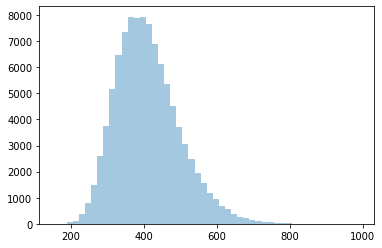

In [84]:
sns.distplot(serie_media_dmax, kde=False, norm_hist=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


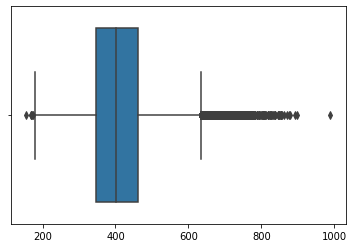

In [97]:
sns.boxplot(serie_media_dmax)

In [87]:
print(f'El error estandar de la media es: {serie_media_dmax.std()}')
print(f'Valor mínimo: {serie_media_dmax.min()}')
print(f'Media: {serie_media_dmax.mean()}')
print(f'Valor máximo: {serie_media_dmax.max()}')
print(f'Rango: {serie_media_dmax.max()-serie_media_dmax.min()}')

El error estandar de la media es: 87.05419717386978
Valor mínimo: 154.43139924185002
Media: 410.3268883132378
Valor máximo: 989.293285709896
Rango: 834.861886468046


In [89]:
lim_inf_90 = serie_media_dmax.quantile(0.05)
lim_sup_90 = serie_media_dmax.quantile(0.9)
print(f'El intervalo de confianza del 90% es: {lim_inf_90} < {dmax.mean()} > {lim_sup_90}')

El intervalo de confianza del 90% es: 285.6305225206671 < 410.0860422397653 > 526.6599116513406


In [90]:
lim_inf_95 = serie_media_dmax.quantile(0.025)
lim_sup_95 = serie_media_dmax.quantile(0.975)
print(f'El intervalo de confianza del 95% es: {lim_inf_95} < {dmax.mean()} > {lim_sup_95}')

El intervalo de confianza del 95% es: 268.3860470959051 < 410.0860422397653 > 608.1643668537804


In [91]:
lim_inf_99 = serie_media_dmax.quantile(0.005)
lim_sup_99 = serie_media_dmax.quantile(0.995)
print(f'El intervalo de confianza del 99% es: {lim_inf_99} < {dmax.mean()} > {lim_sup_99}')

El intervalo de confianza del 99% es: 236.03965049797597 < 410.0860422397653 > 685.9846346667973


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


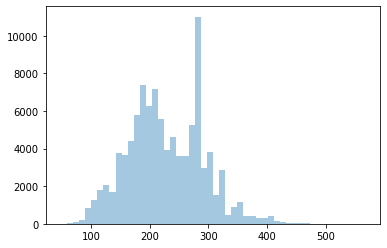

In [92]:
sns.distplot(serie_mediana_dmax, kde=False, norm_hist=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


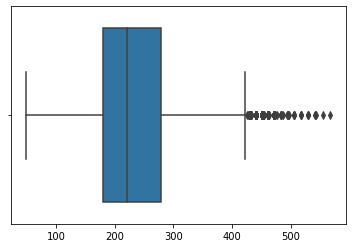

In [98]:
sns.boxplot(serie_mediana_dmax)

In [93]:
print(f'El error estandar de la mediana es: {serie_mediana_dmax.std()}')
print(f'Valor mínimo: {serie_mediana_dmax.min()}')
print(f'Media: {serie_mediana_dmax.mean()}')
print(f'Valor máximo: {serie_mediana_dmax.max()}')
print(f'Rango: {serie_mediana_dmax.max()-serie_mediana_dmax.min()}')

El error estandar de la mediana es: 64.3400044281419
Valor mínimo: 48.3231345713
Media: 227.87266520641583
Valor máximo: 567.5968528656
Rango: 519.2737182943


In [94]:
lim_inf_90 = serie_mediana_dmax.quantile(0.05)
lim_sup_90 = serie_mediana_dmax.quantile(0.9)
print(f'El intervalo de confianza del 90% es: {lim_inf_90} < {dmax.median()} > {lim_sup_90}')

El intervalo de confianza del 90% es: 125.3636170028 < 215.7943048444 > 305.54509697455


In [95]:
lim_inf_95 = serie_mediana_dmax.quantile(0.025)
lim_sup_95 = serie_mediana_dmax.quantile(0.975)
print(f'El intervalo de confianza del 95% es: {lim_inf_95} < {dmax.median()} > {lim_sup_95}')

El intervalo de confianza del 95% es: 110.70190586965 < 215.7943048444 > 358.1294030194


In [96]:
lim_inf_99 = serie_mediana_dmax.quantile(0.005)
lim_sup_99 = serie_mediana_dmax.quantile(0.995)
print(f'El intervalo de confianza del 99% es: {lim_inf_99} < {dmax.median()} > {lim_sup_99}')

El intervalo de confianza del 99% es: 94.2975334737 < 215.7943048444 > 411.1875710413


Dataset de entrenamiento y prueba

In [3]:
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isna().sum()

pregnancies                   0
glucose                       0
blood_pressure                0
skin_thickness                0
insulin                       0
bmi                           0
diabetes_pedigree_function    0
age                           0
outcome                       0
dtype: int64

In [5]:
df = df.drop(columns='outcome')

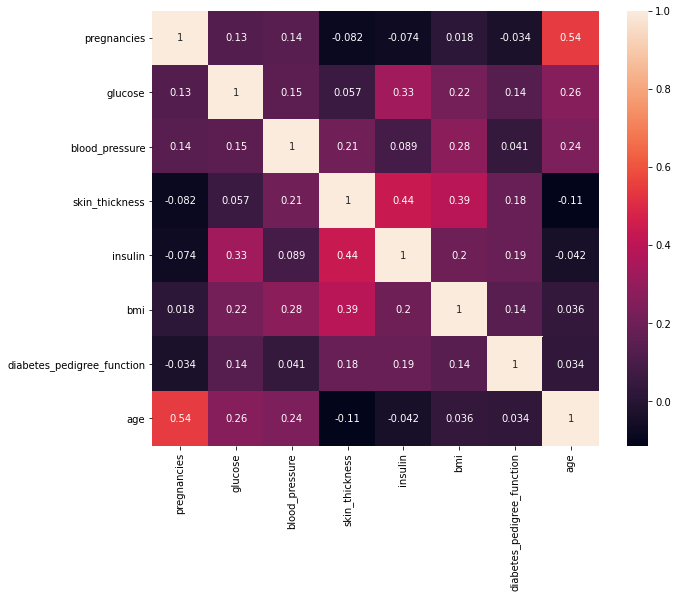

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x = df[['glucose', 'skin_thickness']]
y = df['insulin']

In [24]:
x_training, x_test, y_training, y_test = train_test_split(x, y, test_size=0.3, shuffle=True)

In [12]:
from sklearn.linear_model import LinearRegression

In [25]:
lr = LinearRegression()
lr.fit(x_training, y_training)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
lr.score(x_test, y_test) # es el R2

0.3040690407862804

In [22]:
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
lr.score(x, y)

0.28491868235030937

Validación cruzada de k iteraciones

In [27]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

In [28]:
lr = LinearRegression()

In [29]:
scores = cross_validate(lr, x, y, scoring='r2')

In [30]:
scores

{'fit_time': array([0.01034474, 0.00208282, 0.0021224 , 0.0016861 , 0.00192666]),
 'score_time': array([0.00154519, 0.0011611 , 0.00137067, 0.00104427, 0.00105834]),
 'test_score': array([0.36309888, 0.26517203, 0.29784786, 0.16315445, 0.26375667])}

In [31]:
print(f'Score del modelo: {scores["test_score"].mean():.3f} +/- {scores["test_score"].std():.3f}')

Score del modelo: 0.271 +/- 0.065
